# WeatherPy
----

##### Summary Overview


* There is a correlation between the latitude and temperature at this time of year (r=-.75).  As expected, cities that lie below the equator are warmer and those cities above the equator are colder.  Roughly half of all of the city temperatures are 60 degrees (F) or higher.  44 of the coldest cities, with temperatures under 0 degrees (F) are located in Russia.


* There is no relationship of city latitude and whether or not the weather conditions will be cloudy (r=.06)


* There is no relationship of city latitude and humidity (r=.04).  Perhaps no surprise, the least humid city locations in the World currently are in Africa:  Gat, Sudan (in Northern Hemisphere) and Carnarvon, South Africa (Southern Hemisphere)


* Wind speed is not correlated with Latitude (r=-.00).  More data pulls would need to be done, but the time of day a data pull is taken may impact the current wind speeds seen within cities across the Globe (data pulled at 8AM ET).  



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import date
import datetime


#import reverse_geocoder as rg
#pip3 install reverse-geocode

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

city_data = pd.read_csv('worldcitiespop.txt', encoding = 'utf8', low_memory=False)

#print(city_data.info())
#print(city_data.columns)

# looked up Pgh lat, long
# using the citipy import
city = citipy.nearest_city(40.43, -79.99)

#city

print('Testing out citipy')
print('')
print(f'I grew up in {city.city_name.title()} in country: {city.country_code.upper()}')    # PGH, my hometown


Testing out citipy

I grew up in Pittsburgh in country: US


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=700)
lngs = np.random.uniform(low=-180.000, high=180.000, size=700)
lat_lngs = zip(lats, lngs)



# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.title())

# Print the city count to confirm sufficient count

cities.sort()
print(cities[0:10])
len(cities)


query_url = "http://api.openweathermap.org/data/2.5/weather?q=London"
api_key =  "&APPID={api_keys}"
w_data = requests.get(query_url+api_keys).json()

#USED to build code
# print('')
# print(w_data['main']['temp'], w_data['main']['humidity'],w_data['clouds']['all'])
# print(w_data['coord']['lat'], w_data['coord']['lon'])
# print(w_data['wind']['speed'])
# print('')
#pprint(w_data)

query_url = "http://api.openweathermap.org/data/2.5/weather?q=London"
api_key =  f"&APPID={api_keys}"
w_data = requests.get(query_url+api_keys).json()

pprint(w_data)



['Aberdeen', 'Abu Dhabi', 'Abu Dhabi', 'Abu Jubayhah', 'Acuna', 'Adamantina', 'Adiake', 'Adrar', 'Adre', 'Aflu']
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1545398400,
 'id': 2643743,
 'main': {'humidity': 62,
          'pressure': 1000,
          'temp': 284.69,
          'temp_max': 286.15,
          'temp_min': 283.15},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'message': 0.0068,
         'sunrise': 1545379442,
         'sunset': 1545407622,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'gust': 18.5, 'speed': 11.8}}


### Perform API Calls


In [3]:
def get_city(getcity):
    query_url = "http://api.openweathermap.org/data/2.5/weather?q="
    api_key =  "&APPID=11951c2b2411ddd61cc529e6c8049d27"
    w_data = requests.get(query_url+getcity+api_key).json()
    #pprint(w_data, indent=4)
   
    try:
        
        city_name = w_data['name']
        country_cd = w_data['sys']['country']
        
        if c not in city:
            pprint(f'Processing Record Number {x+1} || {city_name}, {country_cd}' )
            city.append(city_name)
            country.append(country_cd)
            temp_fahr = w_data['main']['temp_max'] * 1.8 - 459.67
        
            temperature.append(temp_fahr)
        
            humidity.append(w_data['main']['humidity'])
            clouds.append(w_data['clouds']['all'])
            lat.append(w_data['coord']['lat'])
            lon.append(w_data['coord']['lon'])
            wind_speed.append(w_data['wind']['speed'])
            the_date.append(datetime.datetime.fromtimestamp(int(w_data['dt'])).strftime('%Y-%m-%d %H:%M:%S'))

  
    except (KeyError, IndexError):
        print("Error Code 404 Occurred :  City Not Found, skipping over...")
    #pprint(f'Grabbing City Number {x+1} : {city_name}' )
    #pprint(query_url+getcity+api_key)
    return;

#test_cities = ['Busselton', 'London', 'Pittsburgh', 'xxxx','Saint-Philippe']
#print(test_cities)

city = []
country = []
temperature = []
humidity = []
clouds = []
lat = []
lon = []
wind_speed= []
the_date = []

print (" Begin Data Retrieval Process ")
print (" --------------------------------------------")
for x in range(len(cities)):
    # Get one of the posts
    #print(cities[x])
    c = str(cities[x])
    get_city(c)
    
    



 Begin Data Retrieval Process 
 --------------------------------------------
'Processing Record Number 1 || Aberdeen, US'
'Processing Record Number 2 || Abu Dhabi, AE'
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
'Processing Record Number 6 || Adamantina, BR'
'Processing Record Number 7 || Adiake, CI'
'Processing Record Number 8 || Adrar, DZ'
'Processing Record Number 9 || Adre, TD'
Error Code 404 Occurred :  City Not Found, skipping over...
'Processing Record Number 11 || Agadir, MA'
'Processing Record Number 12 || Aguimes, ES'
'Processing Record Number 14 || Ahipara, NZ'
'Processing Record Number 15 || Airai, TL'
'Processing Record Number 20 || Akdepe, TM'
'Processing Record Number 21 || Aklavik, CA'
'Processing Record Number 24 || Aksha, RU'
'Processing Record Number 25 || Aksu, KZ'
'Processing Record Number 27 || Albany, US'
Error Code 404 Occurred :  City Not Found, skipping over...
'Processing Record Numbe

'Processing Record Number 435 || Cockburn Town, TC'
'Processing Record Number 440 || Cocobeach, GA'
'Processing Record Number 441 || Codrington, AU'
'Processing Record Number 445 || College, US'
'Processing Record Number 447 || Constitucion, MX'
'Processing Record Number 449 || Coos Bay, US'
'Processing Record Number 451 || Cordoba, CO'
'Processing Record Number 452 || Corrientes, AR'
'Processing Record Number 453 || Coxim, BR'
'Processing Record Number 454 || Creel, MX'
'Processing Record Number 455 || Culaman, PH'
'Processing Record Number 456 || Cururupu, BR'
'Processing Record Number 457 || Dalby, AU'
'Processing Record Number 458 || Dali, CN'
'Processing Record Number 459 || Dalvik, SE'
'Processing Record Number 460 || Daru, SL'
'Processing Record Number 461 || Dedza, MW'
'Processing Record Number 462 || Dengzhou, CN'
'Processing Record Number 463 || Deputatskiy, RU'
'Processing Record Number 465 || Dicabisagan, PH'
'Processing Record Number 466 || Dikson, RU'
'Processing Record N

'Processing Record Number 791 || Kendari, ID'
'Processing Record Number 792 || Ketchikan, US'
'Processing Record Number 793 || Khalkhal, IR'
'Processing Record Number 794 || Kharan, PK'
'Processing Record Number 795 || Khatanga, RU'
'Processing Record Number 801 || Khor, RU'
'Processing Record Number 802 || Khuzhir, RU'
'Processing Record Number 803 || Kiama, AU'
'Processing Record Number 804 || Kijang, KR'
'Processing Record Number 805 || Killybegs, IE'
'Processing Record Number 806 || Kimbe, PG'
'Processing Record Number 807 || kimparana, ML'
'Processing Record Number 808 || Kindu, CD'
'Processing Record Number 809 || Kingsport, US'
'Processing Record Number 810 || Kintampo, GH'
'Processing Record Number 811 || Klaksvik, FO'
'Processing Record Number 814 || Knezica, BA'
'Processing Record Number 815 || Ko Samui, TH'
'Processing Record Number 816 || Kodiak, US'
'Processing Record Number 827 || Kodinsk, RU'
'Processing Record Number 828 || Kofele, ET'
'Processing Record Number 829 || K

'Processing Record Number 1099 || Ottawa, CA'
'Processing Record Number 1100 || Outjo, NA'
'Processing Record Number 1101 || Ovruch, UA'
'Processing Record Number 1102 || Paamiut, GL'
'Processing Record Number 1103 || Pacific Grove, US'
'Processing Record Number 1106 || Paita, PE'
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
'Processing Record Number 1109 || Palmer, US'
'Processing Record Number 1110 || Palu, ID'
'Processing Record Number 1111 || Pandegelang, ID'
'Processing Record Number 1112 || Pangnirtung, CA'
'Processing Record Number 1115 || Pangoa, PE'
'Processing Record Number 1116 || Pankrushikha, RU'
'Processing Record Number 1117 || Pannonhalma, HU'
'Processing Record Number 1118 || Pasni, PK'
'Processing Record Number 1119 || Pevek, RU'
'Processing Record Number 1127 || Phalombe, MW'
'Processing Record Number 1128 || Pierre, US'
'Processing Record Number 1129 || Pimenta Bueno, BR'
'Processing Record N

Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
Error Code 404 Occurred :  City Not Found, skipping over...
'Processing Record Number 1511 || Tarko-Sale, RU'
Error Code 404 Occurred :  City Not Found, skippin

### Confirm Number of Cities

In [4]:
len(set(city))

607

### Creating DataFrame and Printing - Exporting to random_cities_weather.csv

In [5]:
df_weather = pd.DataFrame({"City" : city,
                           "Country" : country,
                           "Date" : the_date,
                           "Temperature" : temperature,
                           "Humidity" : humidity,
                           "Clouds" : clouds,
                           "Wind_Speed" : wind_speed,
                            "Latitude" : lat,
                           "Longitude" : lon
                           })

df_weather.head(10)

df_weather.drop_duplicates(subset ="City", 
                     keep = False, inplace = True) 

export = df_weather.to_csv("random_cities_weather.csv")
df_weather.tail(7)

,City,Country,Date,Temperature,Humidity,Clouds,Wind_Speed,Latitude,Longitude
621,Zdvinsk,RU,2018-12-21 08:55:18,8.2166,75,68,10.66,54.70,78.67
622,Zeya,RU,2018-12-21 08:55:18,-14.0584,81,88,1.36,53.74,127.27
623,Zhangye,CN,2018-12-21 08:55:18,3.2216,53,8,1.61,38.94,100.46
624,Zhigansk,RU,2018-12-21 08:55:18,-14.4634,66,56,3.86,66.77,123.37
625,Ziyang,CN,2018-12-21 08:55:18,46.2416,88,64,2.56,30.12,104.65
626,Zrece,SI,2018-12-21 08:20:00,44.6000,85,75,6.70,46.38,15.38
627,Zyryanka,RU,2018-12-21 08:55:19,-31.9684,0,48,1.16,65.73,150.89


### View Data Elements of DataFrame

In [6]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 627
Data columns (total 9 columns):
City           602 non-null object
Country        602 non-null object
Date           602 non-null object
Temperature    602 non-null float64
Humidity       602 non-null int64
Clouds         602 non-null int64
Wind_Speed     602 non-null float64
Latitude       602 non-null float64
Longitude      602 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 47.0+ KB


### Plot Data:  Import random_cities_weather.csv

In [8]:
# Dependencies and Setup PART II to run this section without re-doing the above sections

# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import requests
# import time
# from pprint import pprint
# from datetime import date
# import datetime

df_data = pd.read_csv('random_cities_weather.csv')

df_data.head()

,Unnamed: 0,City,Country,Date,Temperature,Humidity,Clouds,Wind_Speed,Latitude,Longitude
0,0,Aberdeen,US,2018-12-21 07:53:00,24.08,95,90,2.6,45.47,-98.49
1,1,Abu Dhabi,AE,2018-12-21 08:00:00,75.20,53,20,4.1,24.47,54.37
2,2,Adamantina,BR,2018-12-21 08:00:00,93.20,36,0,2.1,-21.69,-51.08
3,3,Adiake,CI,2018-12-21 08:00:00,87.80,70,40,5.1,5.29,-3.30
4,4,Adrar,DZ,2018-12-21 08:00:00,69.80,30,0,8.7,27.87,-0.29


In [3]:
#BUILD A DEF ARGUMENT TO HANDLE THE MULTIPLE PLOTS
date_pull = "12-21-2018"

def weather_plots(yaxis,ycolumn):
    fig = plt.figure()
    plt.grid(linestyle='-', linewidth='0.2', color='gray')
    plt.scatter(df_data["Latitude"],df_data[ycolumn],marker='o', color='green' ,alpha = 0.6, edgecolors='black')
    
    coorelation = np.corrcoef(df_data["Latitude"],df_data[ycolumn])[0,1]
    plt.title(f'City Latitude vs {yaxis} for the Day ({date_pull}) \n Coorelation is {"{:.2f}".format(coorelation)}')
    plt.xlabel("Latitude")
    plt.ylabel(f"{yaxis}")
    fig.savefig(f'City Latitude vs {yaxis} {date_pull}.png', dpi=600)
    return;



# Latitude vs Temperature Plot

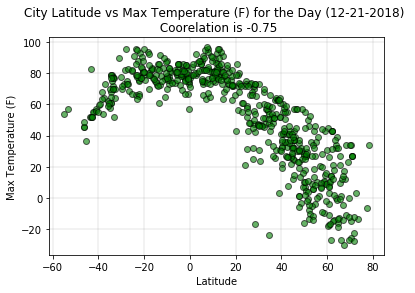

In [106]:
weather_plots("Max Temperature (F)", "Temperature")


In [45]:
from collections import Counter
# Looking at the Countries with Cities Under 0 (F) 

df_cold_cities = df_data[df_data.Temperature < 0]

print(f' Top Countries on {date_pull} with the Coldest Cities in the World')
print(f' Less than 0 Degrees Fahrenheit')
Counter(df_cold_cities['Country']).most_common(5)

 Top Countries on 12-21-2018 with the Coldest Cities in the World
 Less than 0 Degrees Fahrenheit


[('RU', 44), ('CA', 6), ('US', 3), ('MN', 2), ('KZ', 1)]

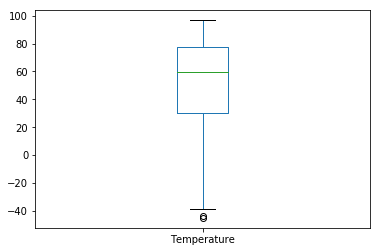

In [32]:
#Plotting Box Plot of Temperature
df_data['Temperature'].plot(kind='box')

In [54]:
#Outliers Observed for Humidity
over100 = df_data[df_data.Humidity > 100]
over100

,Unnamed: 0,City,Country,Date,Temperature,Humidity,Clouds,Wind_Speed,Latitude,Longitude
104,109,Chazuta,PE,2018-12-21 08:00:00,62.6,290,75,1.11,-6.57,-76.13
389,401,Paita,PE,2018-12-21 08:00:00,62.6,290,90,7.70,-5.09,-81.11


In [102]:
# Discovered 2 humidities at 300, data did not make sense
# Discovered that the 0 Humidity values were Russia, when looking at the Weather in these cities, 
# discovered these 0 Humidity values appeared incorrect so they were removed from the analyses

df_data = df_data[df_data.Humidity <= 100]
df_data = df_data[df_data.Humidity !=0]

# Latitude vs Humidity Plot

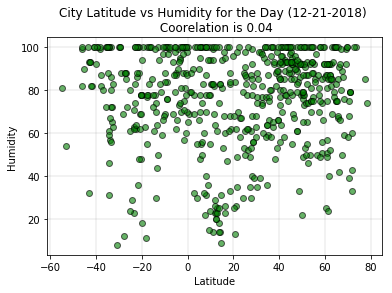

In [107]:
weather_plots("Humidity","Humidity")

In [43]:


# where is it raining or snowing right now?
df_humid_cities = df_data[df_data.Humidity  == 100]

print(f' Countries {date_pull} with Cities of the Highest Humidity (Rain or Snow)')
print(f' Humidity = 100%')

Counter(df_humid_cities['Country']).most_common(5)

# humid = df_humid_cities['Country'].value_counts()
# humid

 Countries 12-21-2018 with Cities of the Highest Humidity (Rain or Snow)
 Humidity = 100%


[('RU', 11), ('ID', 9), ('US', 8), ('NZ', 7), ('BR', 6)]

In [104]:
# Looking at the Countries with Least Humidity (Rain/Snow)

df_lowhumid_cities = df_data[df_data.Humidity <10]

print(f' Countries on {date_pull} with the Lowest Humidity (Dry/Arid)')
print(f' Humidity <10')
df_lowhumid_cities.sort_values(by="Country")

 Countries on 12-21-2018 with the Lowest Humidity (Dry/Arid)
 Humidity <10


,Unnamed: 0,City,Country,Date,Temperature,Humidity,Clouds,Wind_Speed,Latitude,Longitude
162,167,Gat,SN,2018-12-21 08:30:00,91.4000,9,0,6.70,14.69,-16.54
93,98,Carnarvon,ZA,2018-12-21 08:53:05,89.8466,8,0,6.71,-30.97,22.13


# Latitude vs Cloudiness Plot

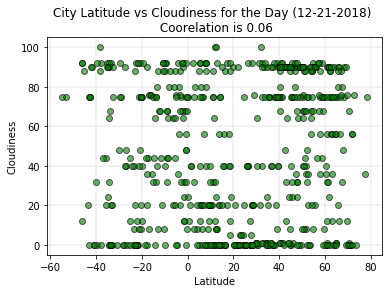

In [108]:
weather_plots("Cloudiness", "Clouds")

# Latitude vs Wind Speed

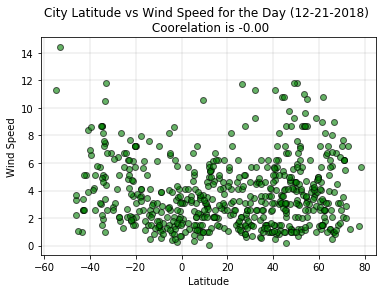

In [109]:
weather_plots("Wind Speed", "Wind_Speed")

In [76]:
# Looking at the Countries where it is Windy

df_wind_cities = df_data[df_data.Wind_Speed > 12]

print(f' Top City on {date_pull} with the Most Wind')
print(f' Wind Speed > 12')
df_wind_cities

 Top City on 12-21-2018 with the Most Wind
 Wind Speed > 12


,Unnamed: 0,City,Country,Date,Temperature,Humidity,Clouds,Wind_Speed,Latitude,Longitude
430,449,Punta Arenas,CL,2018-12-21 08:00:00,57.2,54,75,14.4,-53.16,-70.91


#### LOOKING AT CITIES ON A GOOGLE MAP

In [3]:
import gmaps
# Google developer API key
from config import gkey
# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [4]:
lat_long = pd.DataFrame()

lat_long['lat']= df_data['Latitude']
lat_long['long']=df_data['Longitude']

In [10]:
# Assign the marker layer to a variable
#markers = gmaps.marker_layer(coordinates)
# Add the layer to the map
#fig.add_layer(markers)
#fig
# figured out how to do this using : https://blog.goodaudience.com/google-maps-in-python-part-2-393f96196eaf
city_lay = gmaps.symbol_layer(lat_long
    , fill_color="green", stroke_color="green", scale=2)
fig = gmaps.figure(center=(22.00, 00.00),zoom_level=2.0)
fig.add_layer(city_lay)

#fig.savefig('WeatherPy2 Google Map of Random Cities.png')
fig

Figure(layout=FigureLayout(height='420px'))